# Analysis on France's Imports and Exports Of Pharmaceutical Goods

A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade for pharmaceutical goods for France in the year 2017. 

How much does France export and import cost and is the balanceof trade positive or negative (more exports than imports or vice versa)?

Which are the main trading partners, i.e. from/to which countries does France import/export the most?

Which are the regular customers, i.e. which countries buy Pharmaceutical Products from France every month?

Which countries does France both import from and export to?

# Importing The Dependencies

In [17]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

# Getting and preparing the data

The data is obtained from the United Nations Comtrade website, by selecting the following configuration:

Type of Product: goods

Frequency: monthly

Periods: All through 2017

Reporter: France

Partners: All the countries in the world

Flows: imports and exports

HS (as reported) commodity codes: 3006-Pharmaceutical goods

Clicking on 'Preview' results in a message that the data has over 2000 rows. Data was downloaded using the Download CSV button and the download file renamed appropriately.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#data=pd.read_csv('china_imex.csv')
data1 ='france_imexp.csv'

On reading in the data, the commodity code has to be read as a string, to not lose the leading zero

In [20]:
data = pd.read_csv(data1, dtype={'Commodity Code':str})
data.tail(3)


,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
2082,HS,2017,201701,January 2017,4,0,1,Imports,251,France,...,NaN,NaN,NaN,NaN,743.0,NaN,76618,NaN,NaN,0
2083,HS,2017,201701,January 2017,4,0,1,Imports,251,France,...,NaN,NaN,NaN,NaN,2486.0,NaN,161752,NaN,NaN,0
2084,HS,2017,201701,January 2017,4,0,1,Imports,251,France,...,NaN,NaN,NaN,NaN,79.0,NaN,1770,NaN,NaN,0


In [21]:
print(data.shape)

(2085, 35)


In [22]:
data.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [7]:
def product(code):
    if code == '30': # Pharmaceuticals
        return 'Pharmaceutical_Products'
    return 'unknown'

headings = ["Period", "Partner", "Trade Flow", "Commodity", "Trade Value (US$)"]
Product=data[headings]
Product.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,201703,Luxembourg,Exports,Pharmaceutical goods,32055
1,201706,Slovenia,Exports,Pharmaceutical goods,24712
2,201706,South Africa,Exports,Pharmaceutical goods,102777
3,201706,Finland,Exports,Pharmaceutical goods,101360
4,201703,Senegal,Exports,Pharmaceutical goods,29884


In [23]:
Product = Product[Product['Partner'] != 'World']
Product.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,201703,Luxembourg,Exports,Pharmaceutical goods,32055
1,201706,Slovenia,Exports,Pharmaceutical goods,24712
2,201706,South Africa,Exports,Pharmaceutical goods,102777
3,201706,Finland,Exports,Pharmaceutical goods,101360
4,201703,Senegal,Exports,Pharmaceutical goods,29884


# Total trade flow
To answer the first question, 'how much does France export and import and is the balance positive (more exports than imports)?', the dataframe is split into two groups: exports from France and imports into France. The trade values within each group are summed up to get the total trading.

In [8]:
grouped = Product.groupby(["Trade Flow"])
grouped["Trade Value (US$)"].aggregate(sum)

Trade Flow
Exports     990290319
Imports    1154930792
Name: Trade Value (US$), dtype: int64

This shows a trade deficit of over 100 million dollars.

# Main trade partners
To address the second question, 'Which are the main trading partners, i.e. from/to which countries does France import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [25]:
imports = Product[Product['Trade Flow'] == 'Imports']
grouped = imports.groupby(['Partner'])
print('France imports from', len(grouped), 'countries.')
print('France imports the most from:')
totalImports = grouped['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

France imports from 83 countries.
France imports the most from:


Partner
Germany                     90067626
Italy                       61410225
Ireland                     54440826
United States of America    52927685
Netherlands                 52677779
Name: Trade Value (US$), dtype: int64

The export values can be plotted as a bar chart, making differences between countries easier to see.

<AxesSubplot:ylabel='Partner'>

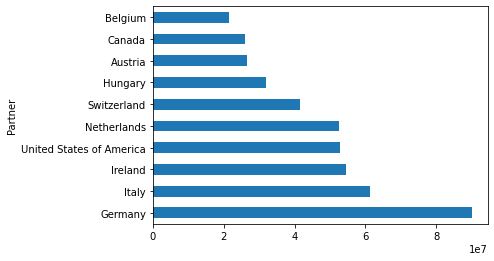

In [27]:
totalImports.head(10).plot(kind='barh')

In [28]:
exports = Product[Product['Trade Flow'] == 'Exports']
grouped = exports.groupby(['Partner'])
print('France exports to', len(grouped), 'countries.')
print('France exports the most to:')
totalExports=grouped['Trade Value (US$)'].aggregate(sum).sort_values(ascending=False,inplace=False).head()
totalExports.head()

France exports to 162 countries.
France exports the most to:


Partner
Spain                       72290567
Germany                     53750510
China, Hong Kong SAR        52532647
United States of America    47504643
Belgium                     39050144
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

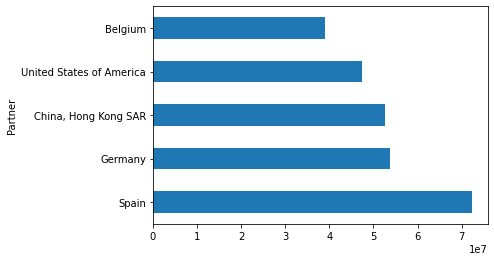

In [30]:
totalExports.head(10).plot(kind='barh')

# Regular importers
Given that there are two commodities, the third question, 'Which are the regular customers, i.e. which countries buys Pharmaceutical Produts from France every month?', is meant in the sense that a regular customer imports both commodities every month. This means that if the exports dataframe is grouped by country, each group has exactly ten rows (two commodities bought each of the five months). To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [32]:
def buysEveryMonth(group):
    return len(group) == 10


grouped = exports.groupby(['Partner'])
regular = grouped.filter(buysEveryMonth)
regular[(regular['Period'] == 201701) & (regular['Commodity']== 'Pharmaceutical goods')]

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
1937,201701,El Salvador,Exports,Pharmaceutical goods,3360
2040,201701,Indonesia,Exports,Pharmaceutical goods,4949


In [33]:
regular['Trade Value (US$)'].sum() / exports['Trade Value (US$)'].sum()

0.0022120018209932546

# Bi-directional trade
To address the fourth question, 'Which countries does France both import from and export to?', a pivot table is used to list the total export and import value for each country.

In [34]:
countries = pivot_table(Product, index=['Partner'], columns=['Trade Flow'], 
                        values='Trade Value (US$)', aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Afghanistan,197.0,NaN
Albania,86673.0,NaN
Algeria,5469941.0,1827.0
Andorra,79192.0,NaN
Angola,8012.0,NaN


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with France.

In [35]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Algeria,5469941.0,1827.0
Argentina,1372935.0,2831558.0
Australia,2383276.0,2920.0
Austria,3275584.0,26605787.0
Bangladesh,47588.0,16.0
...,...,...
Tunisia,1586663.0,4994686.0
Turkey,8646304.0,532204.0
United Kingdom,12185065.0,17470032.0


# Conclusions
The trade of pharmaceutical products of France form January to December 2017 was analysed in terms of which countries France mostly depends on for income (exports) and goods (imports). Over the period, France had a trade deficit of over 100 million US dollars.

France imports the most from Gremany and exports the most to Spain.

France exported to over 162 countries during the period, but only imported from 83 countries, the main ones (top five by trade value) being geographically close. China and Hong Kong are the main importers that are not also main exporters.

France has bi-directional trade (i.e. both exports and imports) with 73 countries, although a few of the trade value (in US dollars) with some countries is suspiciously low, which raises questions about the data's accuracy.
